### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

<span style="color:red">Show a picture of your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>,

1) sampling a uniform distribution in $[0,1]$. Scelgo N = 100 e $M = 10^6$.

Deviazione Standard = 0.000501


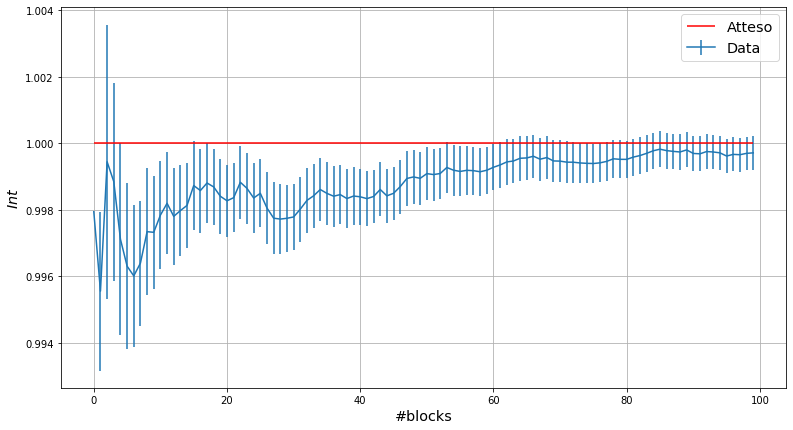

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math

x, mean, dev_std = np.loadtxt("./es2.1_1/integral1.txt", usecols=(0,1,2),  unpack='true')
x=x/10000
plt.figure(figsize=(13,7))
plt.errorbar(x,mean,yerr=dev_std,label='Data')
plt.xlabel('#blocks',fontsize='x-large')
plt.ylabel(r'$Int$',fontsize='x-large')
plt.hlines(y=1.,xmin=min(x), xmax=max(x),color='r', linestyle='-',label="Atteso")
plt.legend(fontsize='x-large')
print("Deviazione Standard =","%.6f" % dev_std[len(dev_std)-1])

plt.grid(True)
plt.show()

2) using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$). Scelgo nuovamente N = 100 e $M = 10^6$.

Ho scelto di utilizzare una distribuzione di probabilità $d(x)=2(1-x)$ in modo da campionare in maniera migliore la funzione $\cos(\pi x/2)$. Pertanto ho estratto numeri utlizzando la seguente relazione:$$x=1-\sqrt{1-y}$$ con $y$ generata uniformemente tra $[0,1)$. Valutando l'integrale:
$$\tilde{I}=\frac{1}{N}\sum_{i=1}^{N}\frac{\pi}{4}\frac{\cos(\pi/2x)}{(1-x)}$$

Deviazione Standard = 0.000134


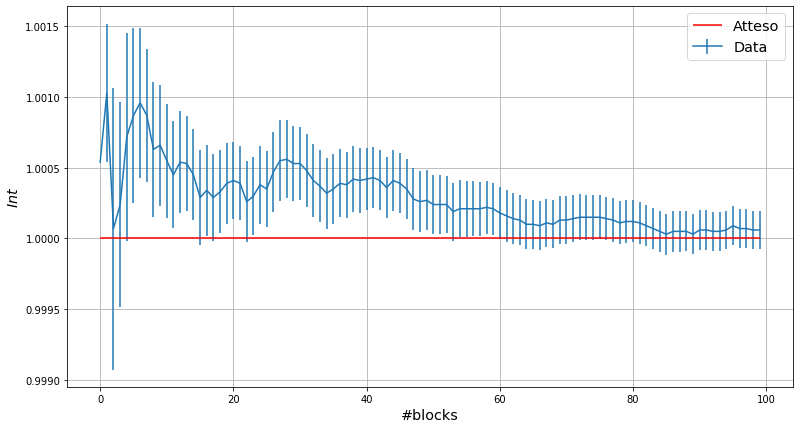

In [3]:
x, mean, dev_std = np.loadtxt("./es2.1_2/integral2.txt", usecols=(0,1,2), unpack='true')
x=x/10000
plt.figure(figsize=(13,7))
plt.errorbar(x,mean,yerr=dev_std,label='Data')
plt.xlabel('#blocks',fontsize='x-large')
plt.ylabel(r'$Int$',fontsize='x-large')
plt.hlines(y=1.,xmin=min(x), xmax=max(x),color='r', linestyle='-',label="Atteso")
plt.legend(fontsize='x-large')
print("Deviazione Standard =","%.6f" % dev_std[len(dev_std)-1])

plt.grid(True)
plt.show()

Noto che utilizzando tale distribuzione di probabilità, rispetto al caso uniforme, si sia ridotta la deviazione standard e quindi la varianza e l'integrale si avvicini più velocemente al valore atteso 1.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin:


1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

In figura riporto gli andamenti nel caso continuo e nel caso discreto. Nel caso discreto ho imposto salti solamente su un reticolo cubico di passo $a=1$ mentre nel caso continuo, ad ogni tempo discreto ho effettuato un passo di lunghezza pari ad $a=1$, ma lungo una direzione casuale ottenuta campionando l'angolo solido. 

In dettaglio $\phi \in [0,2\pi)$ e $\theta$ con distribuzione di probabilità $p(\theta)=\frac{1}{2}\sin\theta$ e quindi $\theta=\cos^{-1}(1-2r)$ con $r\in[0,1)$.

k_d = [1.28098694]
k_c = [0.9999264]


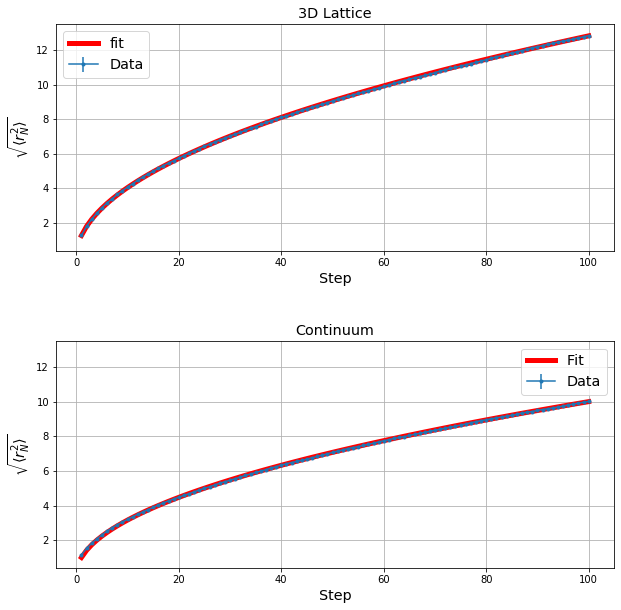

In [6]:
import pickle
from scipy import optimize

def diff(x, k):
  return k*(x)**(0.5) 

x_d, mean_d, dev_std_d = np.loadtxt("./es2.2_1/risultati_discreto.txt", usecols=(0,1,2), unpack='true')
x_c, mean_c, dev_std_c = np.loadtxt("./es2.2_2/risultati_continuo.txt", usecols=(0,1,2), unpack='true')

par_d, par_d_cov = optimize.curve_fit(diff, x_d, mean_d,p0=1.)
par_c, par_c_cov = optimize.curve_fit(diff, x_c, mean_c,p0=1.)
f, axarr = plt.subplots(2,1, sharey=True,figsize=(10,10))
f.subplots_adjust(hspace=0.4, wspace=0.4)

axarr[0].errorbar(x_d,mean_d,yerr=dev_std_d,label='Data', marker='.')
axarr[0].plot(x_d,diff(x_d,par_d),color='r', linestyle='-',label='fit', linewidth = 5 )
axarr[0].set_title('3D Lattice',fontsize='x-large')
axarr[0].set_xlabel('Step',fontsize='x-large')
axarr[0].set_ylabel(r'$\sqrt{\langle r_{N}^{2} \rangle}$',fontsize='x-large')
axarr[0].legend(fontsize='x-large')
axarr[0].grid(True)
print("k_d =",par_d)

axarr[1].plot(x_c,diff(x_c,par_c),color='r', linestyle='-',label='Fit', linewidth = 5)
axarr[1].errorbar(x_c,mean_c,yerr=dev_std_c,label='Data', marker='.')
axarr[1].set_title('Continuum',fontsize='x-large')
axarr[1].set_xlabel('Step',fontsize='x-large')
axarr[1].set_ylabel(r'$\sqrt{\langle r_{N}^{2} \rangle}$',fontsize='x-large')
axarr[1].grid(True)
axarr[1].legend(fontsize='x-large')
print("k_c =",par_c)

plt.show()

Nei grafici noto un andamento diffusivo sia per il Random Walk discreto che continuo. Fittando con la funzione $f(x)=k\sqrt(x)$ entrambe i processi, ottengo un buon accordo con il valore atteso: $k\simeq\sqrt{a}=1$. Le barre di errore sono contenute all'interno della linea del grafico.